In [3]:
#algunas librerías
from scipy import misc
from scipy import ndimage
import matplotlib.pylab as plt
import numpy as np
#from random import random

# Cargar imágenes 

In [4]:
l = misc.imread("Sunflowers.jpg")
l.shape

c:\python27\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


(359, 580, 3)

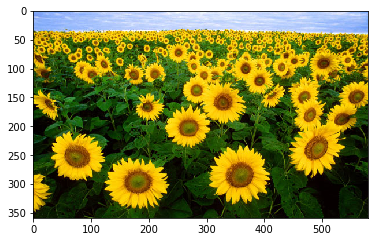

In [5]:
plt.imshow(l)
#plt.axis('off')
plt.show()

## Accede a cada uno de los canales de la imagen a color


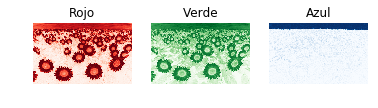

In [6]:
plt.subplot(131)
plt.imshow(l[:,:,0],cmap="Reds") #rojo
plt.axis('off')
plt.title("Rojo")
plt.subplot(132)
plt.imshow(l[:,:,1],cmap="Greens") #verde
plt.title("Verde")
plt.axis('off')
plt.subplot(133)
plt.imshow(l[:,:,2],cmap="Blues") #azul
plt.title("Azul")
plt.axis('off')
plt.show()

## Leemos algunos elementos de la imagen

In [ ]:
l[100,100,0]

In [ ]:
l[100:110, 100:110, 0]

In [ ]:
np.max(l) #máximo valor de intesidad

In [ ]:
np.min(l) #mínimo valor de intensidad

In [7]:
print np.mean(l) #intensidad promedio y desviación estándar
print np.std(l)

87.8097108827202
89.63550426143438


## histograma de frecuencias

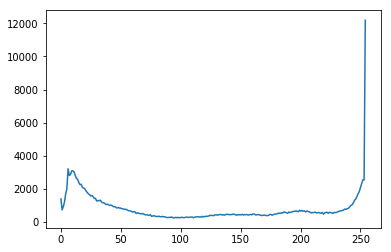

In [8]:
h = np.histogram(l[:,:,0], bins=256)

plt.plot(h[1][0:-1], h[0])
plt.show()

## modificamos valores de intensidad

In [ ]:
l[100, 100, 0] = 100

In [ ]:
plt.plot(l[100, :, 0])
plt.scatter([100],[100], c="r")
plt.show()

In [ ]:
l[100, :300, 0] = 255

In [ ]:
plt.plot(l[100, :, 0])
plt.show()

In [ ]:
plt.imshow(l)
plt.axis('off')
plt.show()

In [ ]:
l[:300, :300, 0] = 255
plt.imshow(l)
plt.axis('off')
plt.show()

# Transformaciones puntuales

Con estas transformaciones modificamos la intensidad de una imagen. Pueden ser resumidas mediante la sguiente expresión:

$$\forall r,c: \; I'[r,c] = f(I[r,c])$$ en ella indicamos que transformamos la intensidad del pixel ubicado en las coordenadas $(r,c)$ por medio de la función $f$ para obtener la intensidad transormada $I'[r,c]$. 

A continuación ,ostramos alguos ejemplos, algunos de ellos arbitrarios:

## Convertimos la imagen a escalas de grises

c:\python27\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


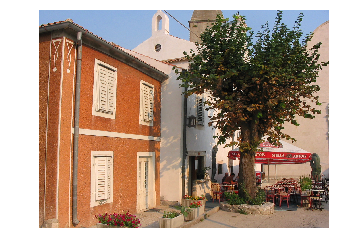

In [9]:
l = misc.imread("croatia-02.jpg")
plt.imshow(l)
plt.axis('off')
plt.show()

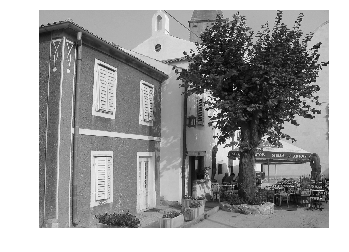

In [10]:
g = 0.2989 * l[:,:,0] + 0.5870 * l[:,:,1] + 0.1140 * l[:,:,2]
plt.imshow(g, cmap="gray")
plt.axis('off')
plt.show()

## Construímos el negativo de la imagen

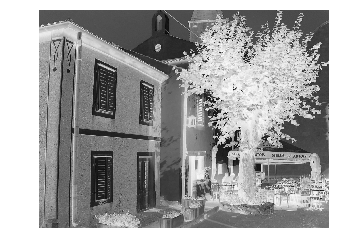

In [11]:
gn = -g
plt.imshow(gn, cmap="gray")
plt.axis('off')
plt.show()

In [12]:
print np.min(gn)
print np.max(gn)

-252.6066
-0.0


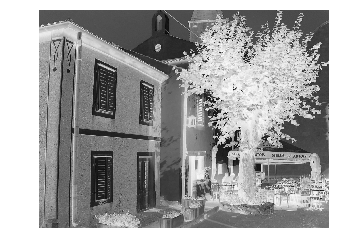

In [13]:
gn = np.max(g)-g
plt.imshow(gn, cmap="gray")
plt.axis('off')
plt.show()

In [14]:
print np.min(gn)
print np.max(gn)

0.0
252.6066


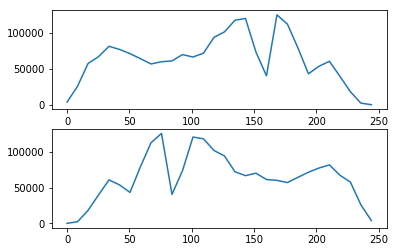

In [15]:
h = np.histogram(g, bins=30)
hn = np.histogram(gn, bins=30)

plt.subplot(211)
plt.plot(h[1][0:-1], h[0])
plt.subplot(212)
plt.plot(hn[1][0:-1], hn[0])
plt.show()

## Otras transformaciones

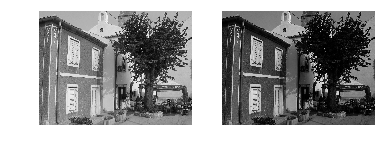

In [16]:
gt = np.power(g,2)

plt.subplot(121)
plt.imshow(g, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.imshow(gt, cmap="gray")
plt.axis('off')

plt.show()

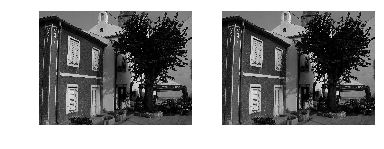

63810.09436355999

In [17]:
gt2 = 255*gt/np.max(gt)

plt.subplot(121)
plt.imshow(gt, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.imshow(gt2, cmap="gray")
plt.axis('off')

plt.show()
np.max(gt)

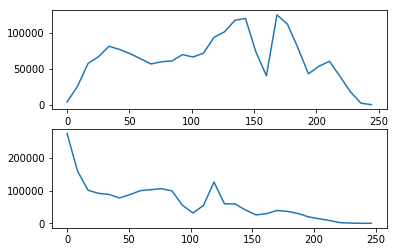

In [18]:
h = np.histogram(g, bins=30)
hn = np.histogram(gt2, bins=30)

plt.subplot(211)
plt.plot(h[1][0:-1], h[0])
plt.subplot(212)
plt.plot(hn[1][0:-1], hn[0])
plt.show()

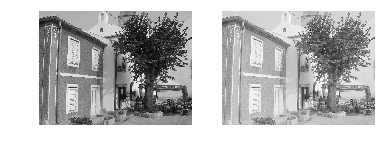

In [19]:
gt = np.power(g,0.5)

plt.subplot(121)
plt.imshow(g, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.imshow(gt, cmap="gray")
plt.axis('off')

plt.show()

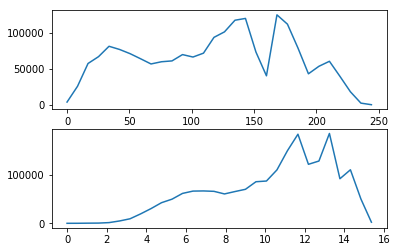

In [21]:
h = np.histogram(g, bins=30)
hn = np.histogram(gt, bins=30)

plt.subplot(211)
plt.plot(h[1][0:-1], h[0])
plt.subplot(212)
plt.plot(hn[1][0:-1], hn[0])
plt.show()

## Agregamos ruido gaussiano

In [ ]:
from random import random
(ren, col) = g.shape
In = np.zeros((ren,col))

for r in range(ren):
    for c in range(col):
        In[r,c] = g[r,c]+np.random.normal(loc=0, scale=30)
plt.subplot(121)
plt.imshow(g, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.imshow(In, cmap="gray")
plt.axis('off')
plt.show()

## Ruido Sal y Pimienta

In [ ]:
from random import random
(ren, col) = g.shape
In = np.zeros((ren,col))

for r in range(ren):
    for c in range(col):
        if random() < 0.1:
            In[r,c] = 255 if random() < 0.5 else 0
        else:
            In[r,c] = g[r,c]
plt.subplot(121)
plt.imshow(g, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.imshow(In, cmap="gray")
plt.axis('off')
plt.show()